# Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:


1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 



Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv



# EXPLORATION OF DATASET:

In [103]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [104]:
#Downloading the raw data and loading into dataframe with the help of pandas library
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv")

In [105]:
#For viewing the first 5 columns in given dataset
df.head(5)

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [106]:
#To know about the no of rows and columns in the dataset
df.shape

(613, 13)

There are 613 rows and 13 columns in the dataset.

In [107]:
df.columns

Index(['LP001002', 'Male', 'No', '0', 'Graduate', 'No.1', '5849', '0.1',
       'Unnamed: 8', '360', '1', 'Urban', 'Y'],
      dtype='object')

In [108]:
#name all the columns:
name=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Applicant Income","CoapplicantIncome","Loan_Amount","Loan_Amount_Term","Credit History","Property_Area","Loan_Status"]

In [109]:
#To change the column name
df.columns=name

In [110]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   Applicant Income   613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [111]:
cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\nThe count of categoricdal columns are:",len(cat_col))

Categorical columns are: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

The count of categoricdal columns are: 8


In [112]:
num_col = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",num_col)
print("\nThe count of Numerical Columns are",len(num_col))

Numerical columns are: Index(['Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History'],
      dtype='object')

The count of Numerical Columns are 5


In [113]:
#Unique values in the column
below_12=[]
for i in df.columns:
    print("Unique Value count of",i,"column:",len(df[i].unique()))
    if (len(df[i].unique())<12):
        below_12.append(i)

Unique Value count of Loan_ID column: 613
Unique Value count of Gender column: 3
Unique Value count of Married column: 3
Unique Value count of Dependents column: 5
Unique Value count of Education column: 2
Unique Value count of Self_Employed column: 3
Unique Value count of Applicant Income column: 504
Unique Value count of CoapplicantIncome column: 287
Unique Value count of Loan_Amount column: 204
Unique Value count of Loan_Amount_Term column: 11
Unique Value count of Credit History column: 3
Unique Value count of Property_Area column: 3
Unique Value count of Loan_Status column: 2


In [114]:
for i in below_12:
    print("Unique values of these columns:",i,"-",df[i].unique())

Unique values of these columns: Gender - ['Male' 'Female' nan]
Unique values of these columns: Married - ['Yes' 'No' nan]
Unique values of these columns: Dependents - ['1' '0' '2' '3+' nan]
Unique values of these columns: Education - ['Graduate' 'Not Graduate']
Unique values of these columns: Self_Employed - ['No' 'Yes' nan]
Unique values of these columns: Loan_Amount_Term - [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Unique values of these columns: Credit History - [ 1.  0. nan]
Unique values of these columns: Property_Area - ['Rural' 'Urban' 'Semiurban']
Unique values of these columns: Loan_Status - ['N' 'Y']


In [115]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Observation:
   
   From this exploration we came to know that there are 613 rows and 13 columns in the dataset.There are 8 columns with object datatype and 5 columns with int,float datatype.There are 9 columns that has unique values less that 12. Certain columns has text data in the category we need to perform encoding.Further proceeding the dataset to the statistical analysis.
    

# Identifying the missing values:

In [116]:
#To know about the missing values in the given dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [117]:
round((df.isnull().sum()/df.shape[0])*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.45
Education            0.00
Self_Employed        5.22
Applicant Income     0.00
CoapplicantIncome    0.00
Loan_Amount          3.43
Loan_Amount_Term     2.28
Credit History       8.16
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [118]:
#Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                   Missing Values  % Missing data
Credit History                 50        8.156607
Self_Employed                  32        5.220228
Loan_Amount                    21        3.425775
Dependents                     15        2.446982
Loan_Amount_Term               14        2.283850
Gender                         13        2.120718
Married                         3        0.489396
Loan_ID                         0        0.000000
Education                       0        0.000000
Applicant Income                0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [119]:
df=df.dropna()

In [120]:
df.shape

(480, 13)

There are 21% loss of the data in the dataset.

In [121]:
#To know about the missing values in the given dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

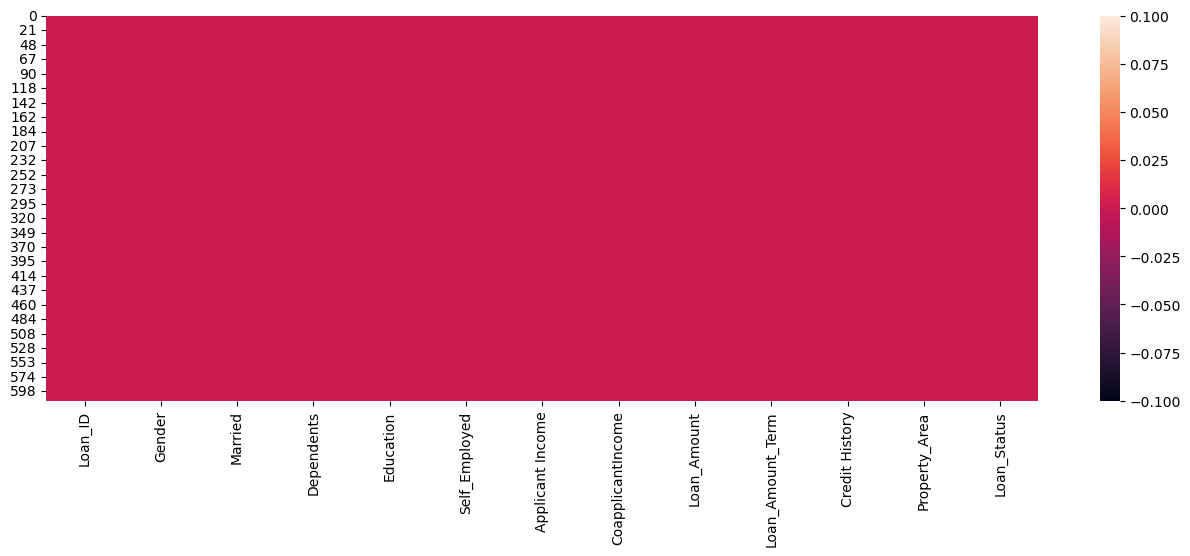

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull())

There is no missing values in the dataset further we can proceed the dataset for the futher analysis.

# Statistical Analysis of the dataset:

In [123]:
#To know more about the statistical description of the dataset
df.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


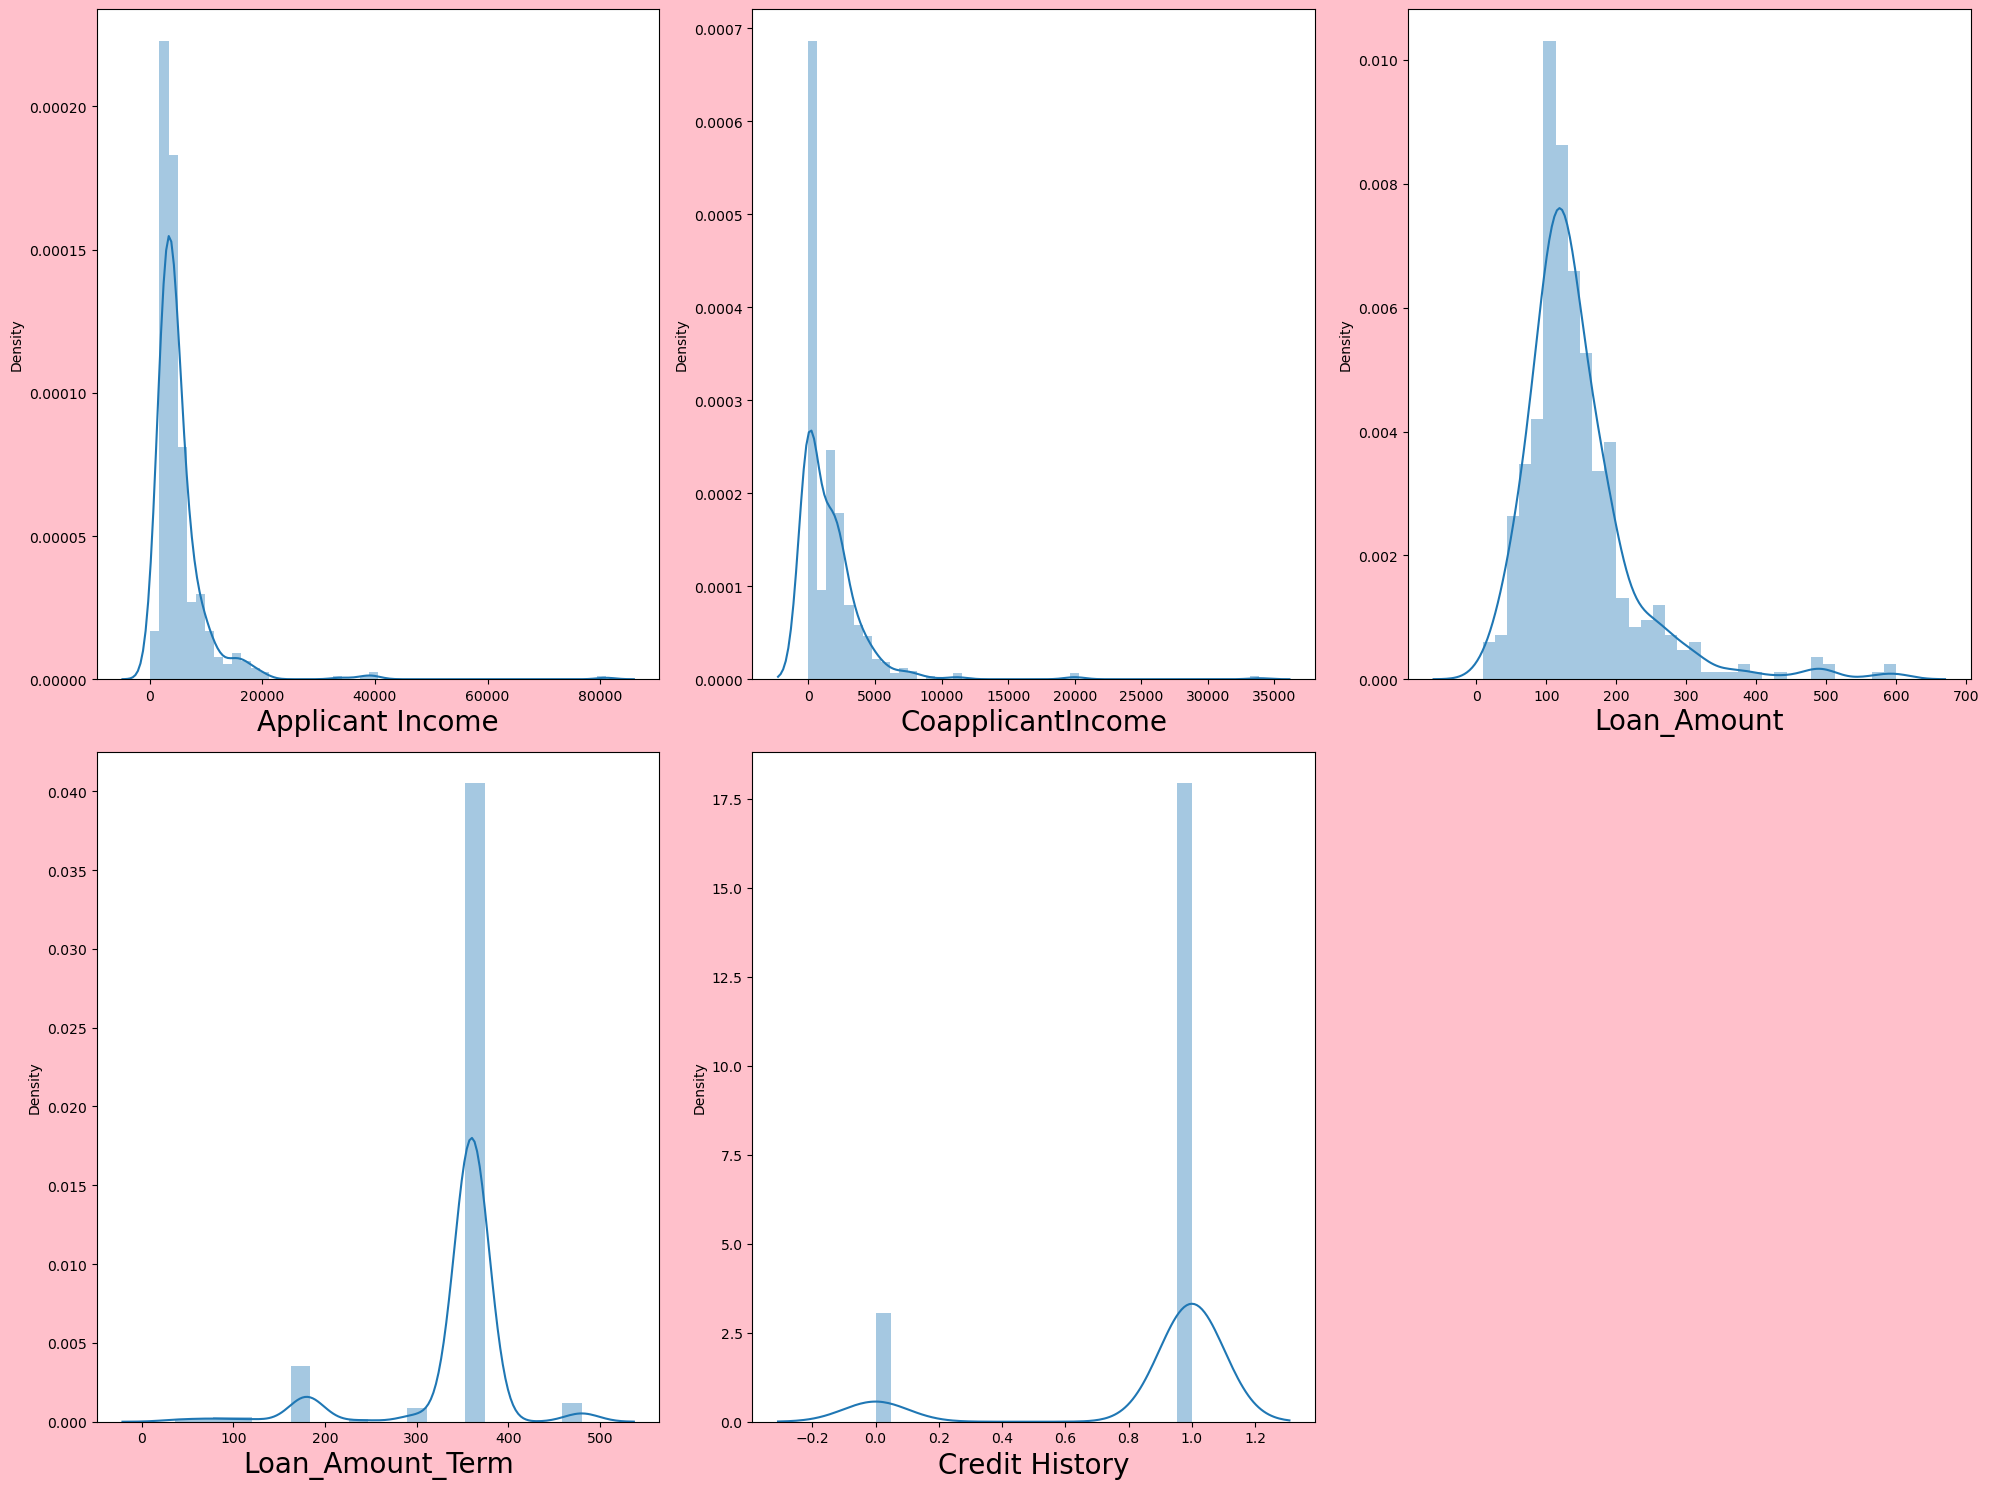

In [124]:
#To see the distribution among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation:

1]The count of all columns are equal there is no missing values in the dataset.

2]The mean value is greater than median value refers to right skewed distibution of data.These columns have right skewed data
[Applicant Income,CoapplicantIncome,Loan_Amount]

3]The mean value is lower than median value refers to the left skewed distribution of data.These columns have left skewed data
[Loan_Amount_Term]

4]Credit History - numerical categorical column with data 1 and 0.

5]There are outliers present in the [Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term]

In [125]:
#To check the skewness:
df.skew()

Applicant Income     6.917027
CoapplicantIncome    5.881622
Loan_Amount          2.361437
Loan_Amount_Term    -2.333710
Credit History      -2.013253
dtype: float64

There are skeweness in the almost all the numerical columns with the help of power transformer at last we will handle all these.

In [126]:
#loan id number doesnot influence much in the loan status removing that particular column
df.drop(columns="Loan_ID",axis=1,inplace=True)

# Visualisation:

# Univarient Analysis And Bivarient Analysis

In [127]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

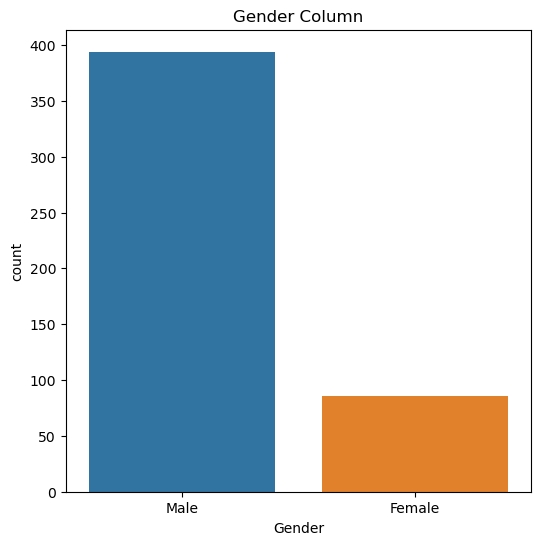

In [128]:
plt.figure(figsize=(6,6))
sns.countplot(x="Gender",data=df)
plt.title("Gender Column")
plt.show()

In [129]:
df["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

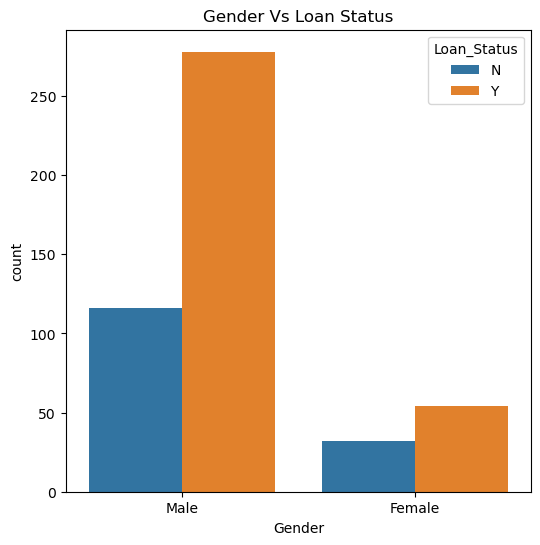

In [130]:
plt.figure(figsize=(6,6))
sns.countplot(x="Gender",hue="Loan_Status",data=df)
plt.title("Gender Vs Loan Status")
plt.show()

From this observation Most of the male has opted for the loan status.

In [131]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

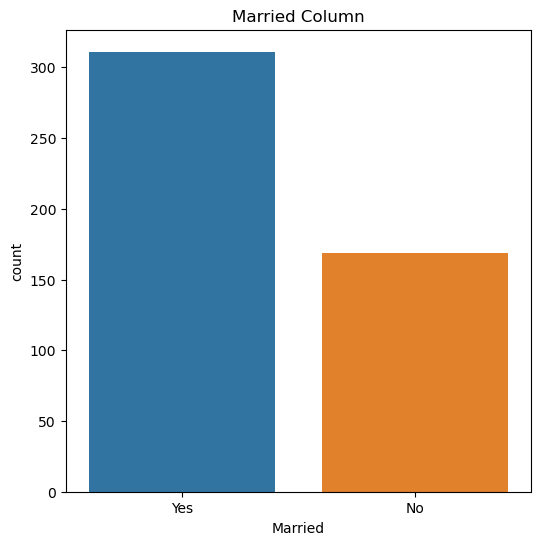

In [132]:
plt.figure(figsize=(6,6))
sns.countplot(x="Married",data=df)
plt.title("Married Column")
plt.show()

In [133]:
df["Married"].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

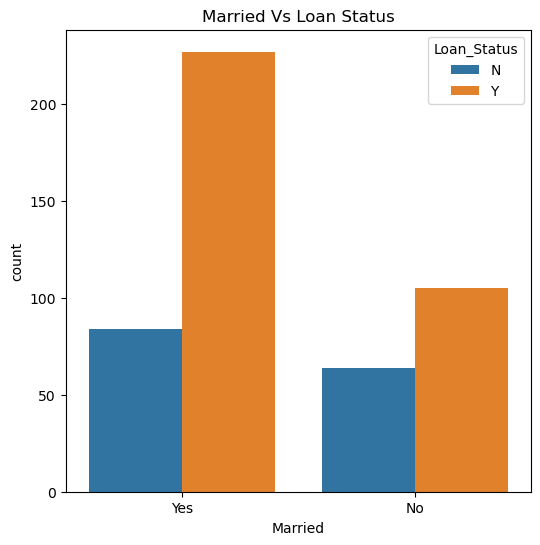

In [134]:
plt.figure(figsize=(6,6))
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.title("Married Vs Loan Status")
plt.show()

 Mostly Married Male   and  Non-married Females opted for the loan.

In [135]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [136]:
df["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

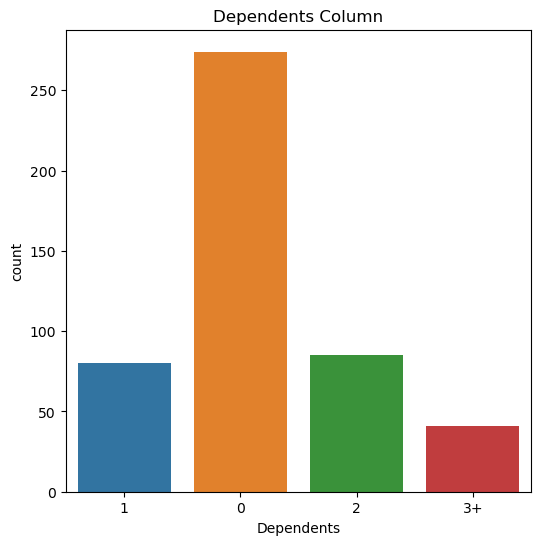

In [137]:
plt.figure(figsize=(6,6))
sns.countplot(x="Dependents",data=df)
plt.title("Dependents Column")
plt.show()

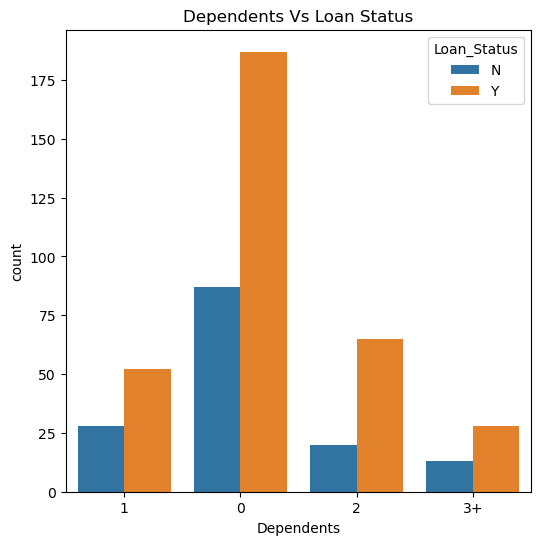

In [138]:
plt.figure(figsize=(6,6))
sns.countplot(x="Dependents",hue="Loan_Status",data=df)
plt.title("Dependents Vs Loan Status")
plt.show()

Dependents with 0 count has got the loan and 3+ dependents got least loan.

In [139]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [140]:
df["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

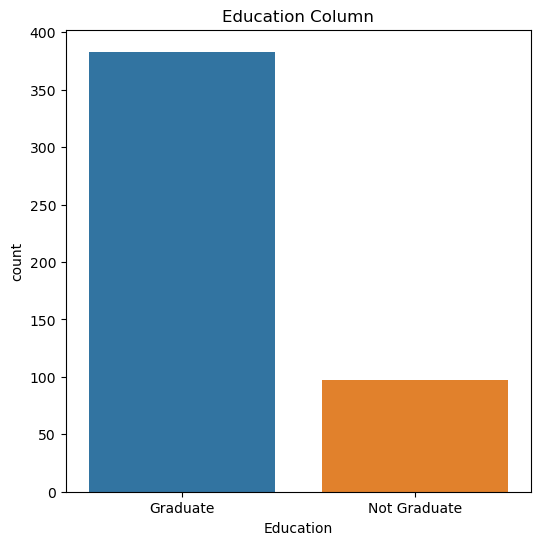

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(x="Education",data=df)
plt.title("Education Column")
plt.show()

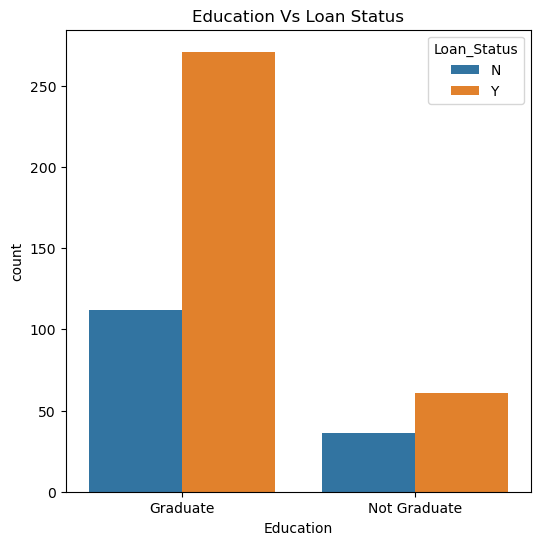

In [142]:
plt.figure(figsize=(6,6))
sns.countplot(x="Education",hue="Loan_Status",data=df)
plt.title("Education Vs Loan Status")
plt.show()

Mostly graduates opted for the loan compared to the not Graduate.

In [143]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [144]:
df["Self_Employed"].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

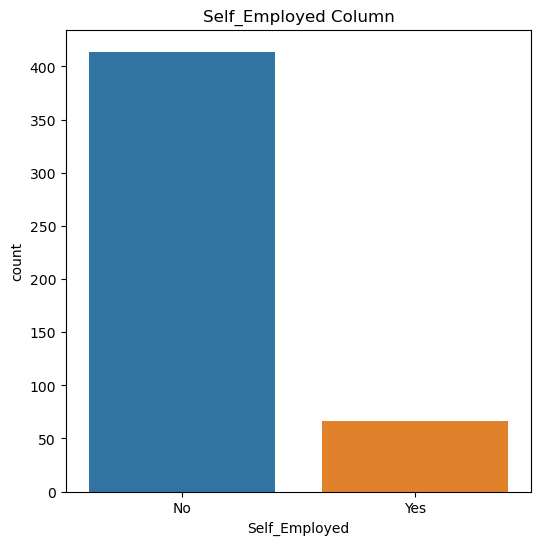

In [145]:
plt.figure(figsize=(6,6))
sns.countplot(x="Self_Employed",data=df)
plt.title("Self_Employed Column")
plt.show()

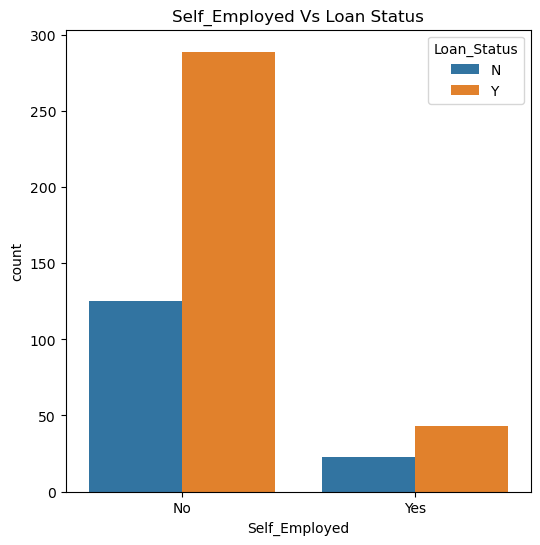

In [146]:
plt.figure(figsize=(6,6))
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)
plt.title("Self_Employed Vs Loan Status")
plt.show()

Mostly not self employed people opted for the loan.

In [147]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [148]:
df["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

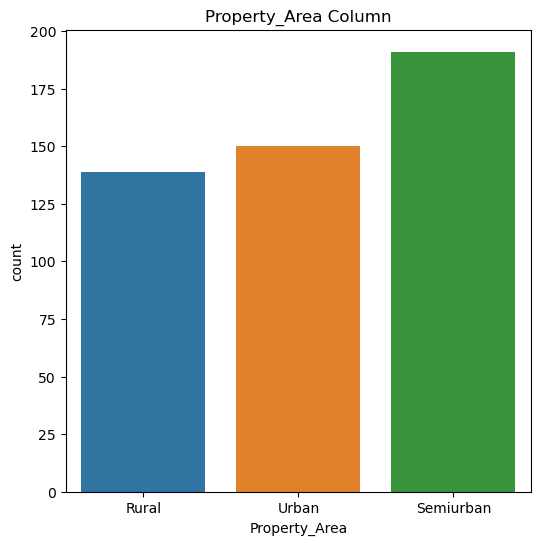

In [149]:
plt.figure(figsize=(6,6))
sns.countplot(x="Property_Area",data=df)
plt.title("Property_Area Column")
plt.show()

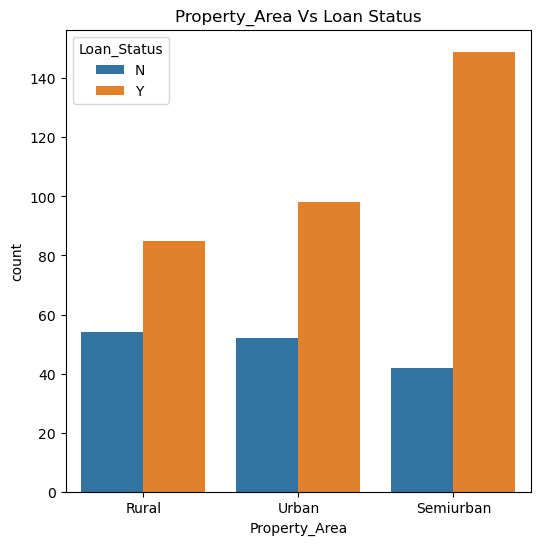

In [150]:
plt.figure(figsize=(6,6))
sns.countplot(x="Property_Area",hue="Loan_Status",data=df)
plt.title("Property_Area Vs Loan Status")
plt.show()

Most of the semiurban opted for the loan.

# Encoding:

Converting text values into numerical values.

In [151]:
cat_col = df.select_dtypes(include=['object']).columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [152]:
#Replacing the Gender column:
df.replace({
    "Gender":{"Male":1,"Female":0}},inplace=True)

In [153]:
#Replacing the Married column:
df.replace({
    "Married":{"Yes":1,"No":0}},inplace=True)

In [154]:
#Replacing the Education column:
df.replace({
    "Education":{"Graduate":1,"Not Graduate":0}},inplace=True)

In [155]:
#Replacing the Self_Employed column:
df.replace({
    "Self_Employed":{"Yes":1,"No":0}},inplace=True)

In [156]:
df["Property_Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [157]:
#Replacing the Self_Employed column:
df.replace({
    "Dependents":{"3+":3}},inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

In [158]:
#Replacing the Self_Employed column:
df.replace({
    "Loan_Status":{"Y":1,"N":0}},inplace=True)

In [159]:
#Converting the property_Area column with label Encoder:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [160]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


All the columns have numerical data we can further proceed the dataset for futher analysis.

In [161]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Corelation:

In [162]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,-0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,-0.059245,-0.001652,-0.028608,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.055005,0.068437
Self_Employed,-0.002761,0.015674,0.045754,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
Applicant Income,0.032644,0.036717,0.131139,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
Loan_Amount,0.098975,0.183442,0.172780,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit History,0.022447,0.029095,-0.026651,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


<Axes: >

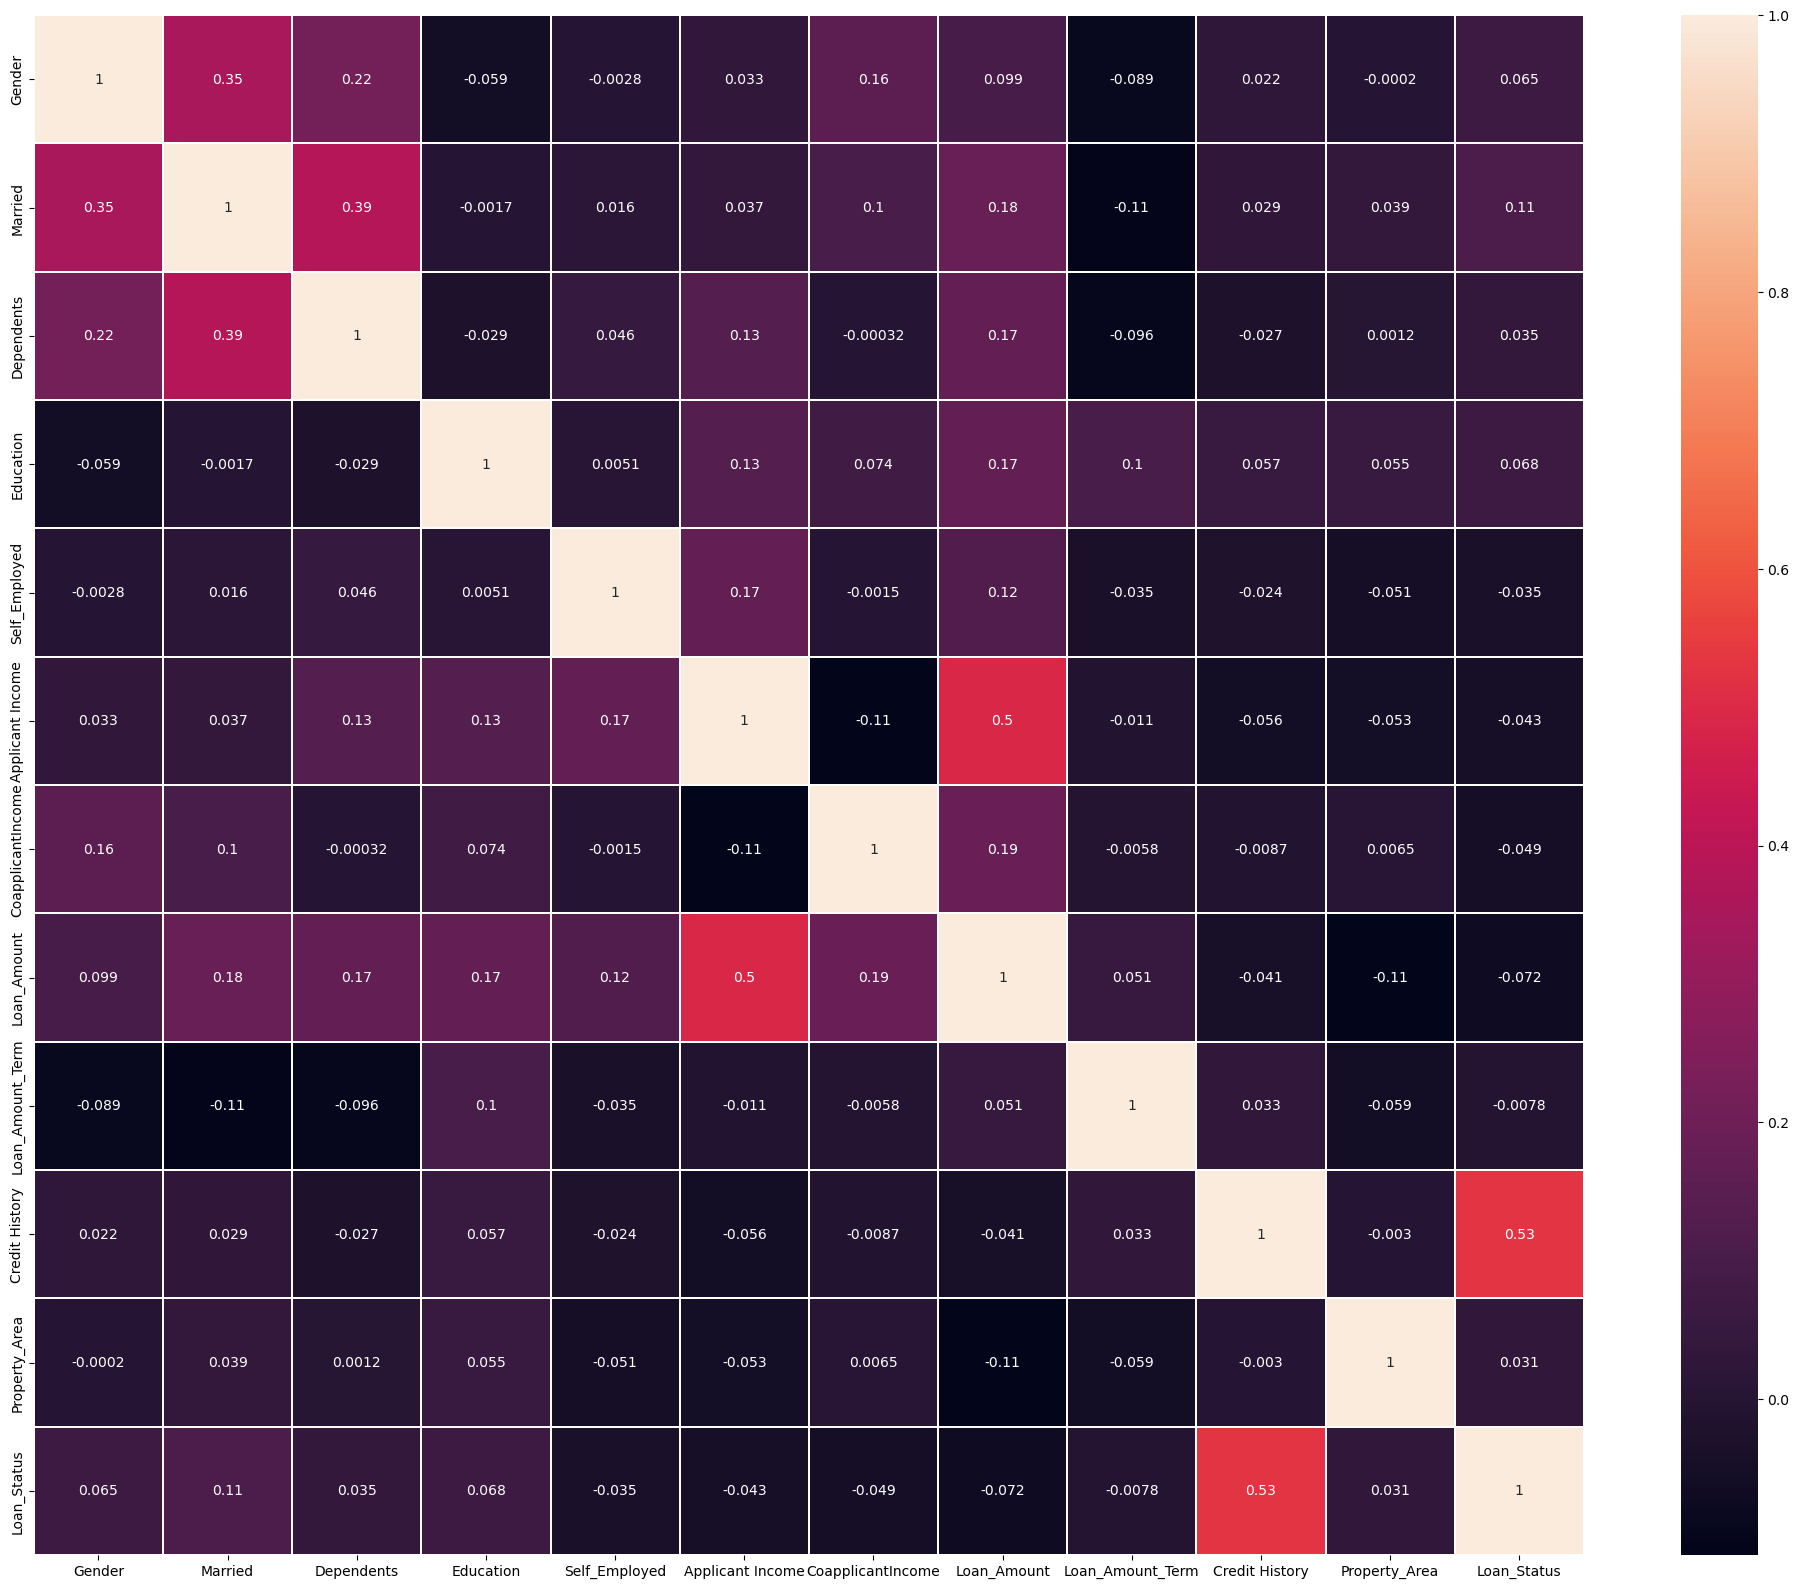

In [163]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=.25)

Observation:
    
    dependent feature: Loan Status
Postively corelated columns: Credit History (53%)
Apart from that all other columns have almost zero corelation.

Loan amount : Postively corelated column (Applicant column(50%))

# Skewness handling

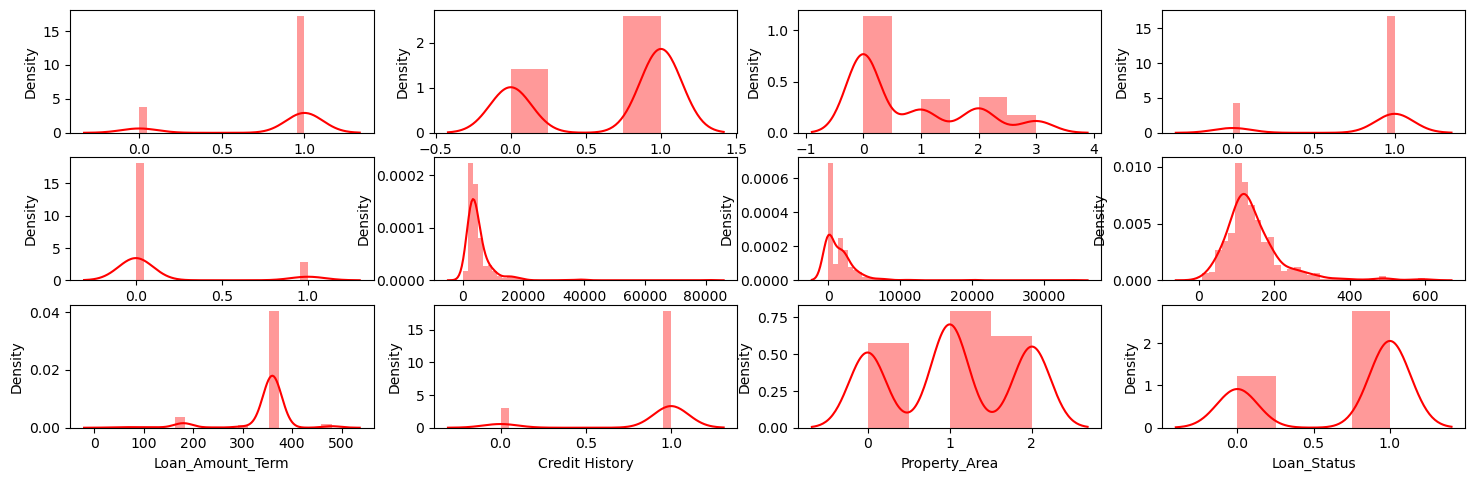

In [164]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [165]:
df.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education           -1.488474
Self_Employed        2.111872
Applicant Income     6.917027
CoapplicantIncome    5.881622
Loan_Amount          2.361437
Loan_Amount_Term    -2.333710
Credit History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

skewness more than+/- 0.5 will we treated

In [166]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')
df[['Applicant Income']]=power_transform(df[['Applicant Income']],method='yeo-johnson')

In [167]:
df.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education           -1.488474
Self_Employed        2.111872
Applicant Income    -0.112745
CoapplicantIncome   -0.127432
Loan_Amount          2.361437
Loan_Amount_Term    -2.333710
Credit History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

With the help of power tranform some of the skewness is reduced.

# Outliers:

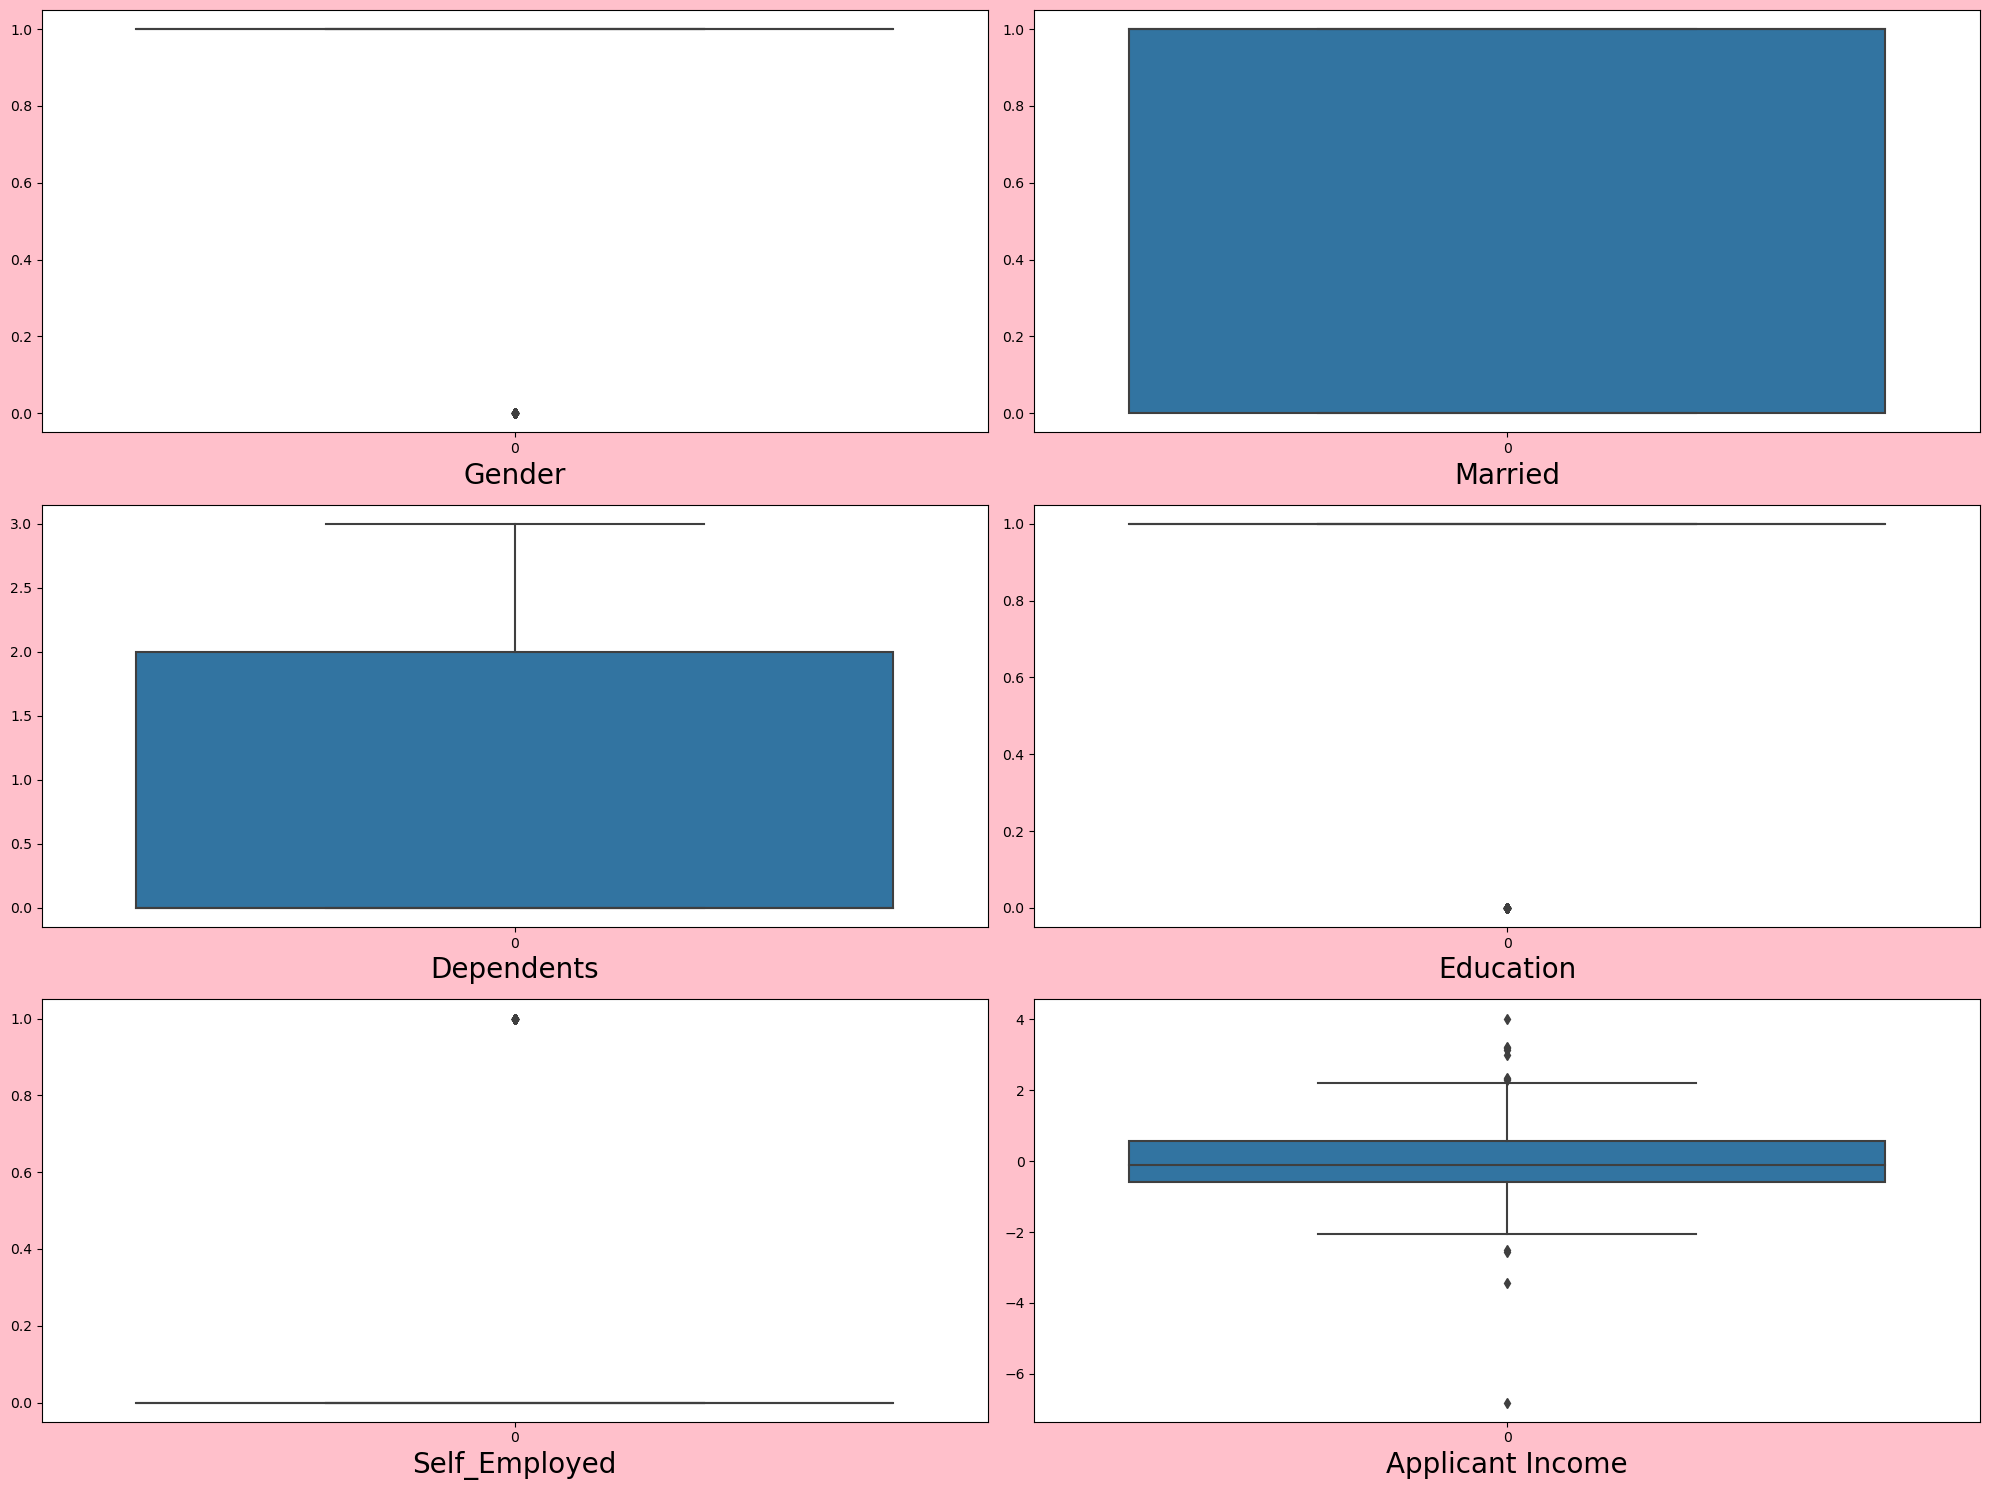

In [168]:
#To see the outliers among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

After using the power transform also some of the columns has the outlier present in them.

# outliers removal

# zscore

In [169]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 12,  54,  75,  98, 120, 120, 137, 144, 170, 187, 205, 220, 244,
       286, 319, 347, 380, 386, 390, 409, 410, 426, 438, 450, 457, 471],
      dtype=int64), array([8, 8, 8, 8, 5, 7, 7, 5, 5, 8, 8, 7, 7, 7, 5, 5, 7, 8, 5, 7, 7, 8,
       7, 8, 8, 7], dtype=int64))


In [170]:
z_scoredf=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",z_scoredf.shape)

with outliers:: (480, 12)
After removing outliers:: (455, 12)


zscore_removed 25 rows from the dataset.

# IQR

In [171]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

1.0

In [172]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQRdf= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQRdf.shape)

(213, 12)


Choosing the zscore

# Checking for the Imbalanced dataset in dependent feature:

In [173]:
df["Loan_Status"].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

 There is imbalanced dataset in dependent feature.

In [174]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

# Splitting The Dataset Into Feature and Target:

In [175]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [176]:
X=df.drop("Loan_Status",axis=1)
Y=df[["Loan_Status"]]

In [177]:
X,Y=sm.fit_resample(X,Y)

In [178]:
X.shape , Y.shape

((664, 11), (664, 1))

Now the dataset looks balanced.

# Standardisation:

In [179]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [180]:
x_scaled=scaler.fit_transform(X)

In [181]:
# best Random_state
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8571428571428571 on Random State = 65


In [182]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,random_state=144,test_size=.20)

# Model Selection:

In [183]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [184]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 84.21052631578947
Confusion Matrix of  LogisticRegression()  is 
 [[51 15]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        66
           1       0.80      0.91      0.85        67

    accuracy                           0.84       133
   macro avg       0.85      0.84      0.84       133
weighted avg       0.85      0.84      0.84       133

**************************************************
Accuracy_Score of  RidgeClassifier() is 82.70676691729322
Confusion Matrix of  RidgeClassifier()  is 
 [[49 17]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        66
           1       0.78      0.91      0.84        67

    accuracy                           0.83       133
   macro avg       0.84      0.83      0.83       133
weighted avg       0.84      0.83      0.83       133

*********************************************

# Cross Validation

In [185]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 84.21052631578947
cross Validation accuracy score of  LogisticRegression()  is  76.06060606060605
**************************************************
Accuracy_Score of  RidgeClassifier() is 82.70676691729322
cross Validation accuracy score of  RidgeClassifier()  is  77.1155160628845
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 72.93233082706767
cross Validation accuracy score of  DecisionTreeClassifier()  is  76.21895648211438
**************************************************
Accuracy_Score of  SVC() is 81.95488721804512
cross Validation accuracy score of  SVC()  is  52.549555707450445
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 75.93984962406014
cross Validation accuracy score of  KNeighborsClassifier()  is  68.67281840966052
**************************************************
Accuracy_Score of  RandomForestClassifier() is 82.70676691729322

# TOP model-1

Accuracy_Score of  RandomForestClassifier() is 83.45864661654136

cross Validation accuracy score of  RandomForestClassifier()  is  81.03098655730236

# Top Model-2:

Accuracy_Score of  GradientBoostingClassifier() is 81.95488721804512

cross Validation accuracy score of  GradientBoostingClassifier()  is  78.16700843016633

# Hyper parameter Tuning - Model-1:

In [186]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [187]:
topmodel1 = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [188]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=topmodel1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)

In [189]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839907 using {'max_features': 'log2', 'n_estimators': 1000}
0.805744 (0.040489) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.836364 (0.035220) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.838896 (0.031990) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.802163 (0.045472) with: {'max_features': 'log2', 'n_estimators': 10}
0.835391 (0.035513) with: {'max_features': 'log2', 'n_estimators': 100}
0.839907 (0.027836) with: {'max_features': 'log2', 'n_estimators': 1000}


Not much Hypertuned in the random forest classifier.

# Hyper parameter Tuning - Model-2:

In [190]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

In [191]:
GBC= GridSearchCV(GB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GBC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [5, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [192]:
GBC.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_depth=6, n_estimators=400)

In [193]:
predicted=GCV.best_estimator_.predict(x_test)

In [194]:
accuracy_score(y_test,predicted)

0.8270676691729323

In [195]:
print('Accuracy score:', round(accuracy_score(y_test,predicted) * 100, 2))
print('F1 score:', round(f1_score(y_test,predicted) * 100, 2))

Accuracy score: 82.71
F1 score: 83.21


<Axes: >

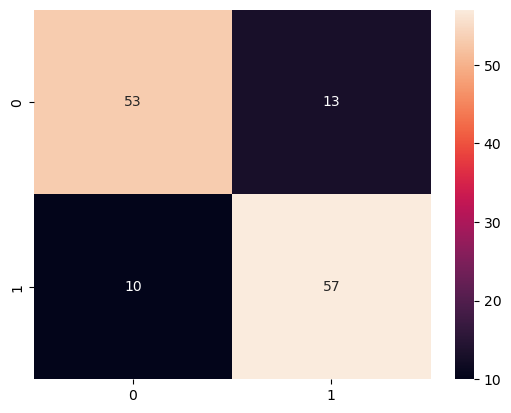

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted)
sns.heatmap(confusion_matrix(y_test,predicted),annot=True, fmt='d')

Finalising the model:
    After hyperparameter tuning the gradient boosting classifier Accuracy increased.So choosing this model as the final model for the loan application status prediction.

# Saving the Model

In [197]:
import joblib
joblib.dump(GBC.best_estimator_,"Loan_Application_Status_Prediction.pkl")

['Loan_Application_Status_Prediction.pkl']

# End of the Project